In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import networkx as nx
import csv
import numpy as np
import sklearn
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Constructing Function

In [22]:
df = pd.read_excel('/content/drive/MyDrive/DS project/ACSST5Y2021.xlsx', sheet_name=1, header=None)

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
0,NaN,"Census Tract 708.01, Suffolk County, Massachus...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Census Tract 801, Suffolk County, Massachusetts",...,NaN,NaN,"Census Tract 9803, Suffolk County, Massachusetts",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Households,NaN,Families,NaN,Married-couple families,NaN,Nonfamily households,NaN,Households,...,Nonfamily households,NaN,Households,NaN,Families,NaN,Married-couple families,NaN,Nonfamily households,NaN
2,Label,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,...,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error
3,Total,559,±133,92,±70,81,±67,467,±149,709,...,316,±129,0,±13,0,±13,0,±13,0,±13
4,"Less than $10,000",0.0%,±6.9,0.0%,±33.6,0.0%,±36.4,0.0%,±8.2,16.1%,...,24.1%,±16.3,-,**,-,**,-,**,-,**
5,"$10,000 to $14,999",9.1%,±12.9,0.0%,±33.6,0.0%,±36.4,10.9%,±15.5,5.6%,...,12.7%,±20.0,-,**,-,**,-,**,-,**
6,"$15,000 to $24,999",7.5%,±8.6,28.3%,±42.9,32.1%,±48.7,3.4%,±5.8,16.4%,...,15.2%,±11.2,-,**,-,**,-,**,-,**
7,"$25,000 to $34,999",3.9%,±6.8,0.0%,±33.6,0.0%,±36.4,4.7%,±8.3,10.4%,...,7.0%,±8.2,-,**,-,**,-,**,-,**
8,"$35,000 to $49,999",18.8%,±15.3,0.0%,±33.6,0.0%,±36.4,22.5%,±18.2,16.6%,...,23.4%,±19.9,-,**,-,**,-,**,-,**
9,"$50,000 to $74,999",3.8%,±5.1,0.0%,±33.6,0.0%,±36.4,4.5%,±6.4,11.0%,...,7.3%,±6.6,-,**,-,**,-,**,-,**


In [20]:
df = pd.read_excel('/content/drive/MyDrive/DS project/ACSST5Y2021.S1901-2023-10-21T013115.xlsx', sheet_name=1, header=None)  # Reading the second sheet and specifying no header

# Now, let's merge the first three rows into one row for column names.
# You can do this by selecting the first three rows and combining them into a single header row.
# You can use the `.iloc` method to select rows by index.

header = df.iloc[0:3].apply(lambda x: '_'.join(x.astype(str)), axis=0)
# Convert the values to strings using `astype(str)` before joining them.

# Now, assign the merged header row as the column names and skip the first three rows.
df.columns = header
df = df[3:]
df = df.set_index(df.columns[0])
df = df.transpose()

FileNotFoundError: ignored

In [ ]:
df

nan_nan_Label,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Median income (dollars),Mean income (dollars),PERCENT ALLOCATED,Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months
"Census Tract 708.01, Suffolk County, Massachusetts_Households_Estimate",559,0.0%,9.1%,7.5%,3.9%,18.8%,3.8%,3.9%,4.1%,18.1%,30.8%,-,"160,064",NaN,26.8%,(X),(X)
nan_nan_Margin of Error,±133,±6.9,±12.9,±8.6,±6.8,±15.3,±5.1,±6.6,±5.1,±14.8,±18.0,**,"±55,998",NaN,(X),(X),(X)
nan_Families_Estimate,92,0.0%,0.0%,28.3%,0.0%,0.0%,0.0%,0.0%,0.0%,21.7%,50.0%,"225,000","279,040",NaN,(X),0.0%,(X)
nan_nan_Margin of Error,±70,±33.6,±33.6,±42.9,±33.6,±33.6,±33.6,±33.6,±33.6,±34.1,±46.9,"±204,431","±197,663",NaN,(X),(X),(X)
nan_Married-couple families_Estimate,81,0.0%,0.0%,32.1%,0.0%,0.0%,0.0%,0.0%,0.0%,24.7%,43.2%,-,N,NaN,(X),(X),(X)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nan_nan_Margin of Error,±13,**,**,**,**,**,**,**,**,**,**,**,**,NaN,(X),(X),(X)
nan_Married-couple families_Estimate,0,-,-,-,-,-,-,-,-,-,-,-,-,NaN,(X),(X),(X)
nan_nan_Margin of Error,±13,**,**,**,**,**,**,**,**,**,**,**,**,NaN,(X),(X),(X)
nan_Nonfamily households_Estimate,0,-,-,-,-,-,-,-,-,-,-,-,-,NaN,(X),(X),-


In [ ]:
df= df[df.reset_index().index % 2 == 0]

In [ ]:
new_df = df.iloc[:4].copy()
# Add a new column named "year" with the value 2021
year = 2021
#new_df['year'] = year
 # Replace with year data
new_df.insert(0, 'year', year)

In [ ]:
new_df

nan_nan_Label,year,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Median income (dollars),Mean income (dollars),PERCENT ALLOCATED,Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months
"Census Tract 708.01, Suffolk County, Massachusetts_Households_Estimate",2021,559,0.0%,9.1%,7.5%,3.9%,18.8%,3.8%,3.9%,4.1%,18.1%,30.8%,-,"160,064",NaN,26.8%,(X),(X)
nan_Families_Estimate,2021,92,0.0%,0.0%,28.3%,0.0%,0.0%,0.0%,0.0%,0.0%,21.7%,50.0%,"225,000","279,040",NaN,(X),0.0%,(X)
nan_Married-couple families_Estimate,2021,81,0.0%,0.0%,32.1%,0.0%,0.0%,0.0%,0.0%,0.0%,24.7%,43.2%,-,N,NaN,(X),(X),(X)
nan_Nonfamily households_Estimate,2021,467,0.0%,10.9%,3.4%,4.7%,22.5%,4.5%,4.7%,4.9%,17.3%,27.0%,-,"128,977",NaN,(X),(X),32.1%


In [ ]:
new_df = new_df.reset_index()

In [ ]:
if isinstance(new_df.iat[0, 0], str) and len(new_df.iat[0, 0]) > 19:
    # Modify the first cell value by slicing it to retain only the last 19 characters
    new_df.iat[0, 0] = new_df.iat[0, 0][-23:]

In [ ]:
new_df = new_df.rename(columns={'index': 'estimate_type'})
new_df['estimate_type'] = new_df['estimate_type'].str[4:]
new_df

nan_nan_Label,estimate_type,year,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Median income (dollars),Mean income (dollars),PERCENT ALLOCATED,Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months
0,Households_Estimate,2021,559,0.0%,9.1%,7.5%,3.9%,18.8%,3.8%,3.9%,4.1%,18.1%,30.8%,-,"160,064",NaN,26.8%,(X),(X)
1,Families_Estimate,2021,92,0.0%,0.0%,28.3%,0.0%,0.0%,0.0%,0.0%,0.0%,21.7%,50.0%,"225,000","279,040",NaN,(X),0.0%,(X)
2,Married-couple families_Estimate,2021,81,0.0%,0.0%,32.1%,0.0%,0.0%,0.0%,0.0%,0.0%,24.7%,43.2%,-,N,NaN,(X),(X),(X)
3,Nonfamily households_Estimate,2021,467,0.0%,10.9%,3.4%,4.7%,22.5%,4.5%,4.7%,4.9%,17.3%,27.0%,-,"128,977",NaN,(X),(X),32.1%


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DS project/ACSST5Y' + str(year) + '.S1901-2023-10-21T033545.xlsx',
                   sheet_name=1, header=None)
# Now, let's merge the first three rows into one row for column names.
# You can do this by selecting the first three rows and combining them into a single header row.
# You can use the `.iloc` method to select rows by index.

header = df.iloc[0:3].apply(lambda x: '_'.join(x.astype(str)), axis=0)
# Convert the values to strings using `astype(str)` before joining them.

# Now, assign the merged header row as the column names and skip the first three rows.
df.columns = header
df = df[3:]
df = df.set_index(df.columns[0])
df = df.transpose()
df= df[df.reset_index().index % 2 == 0]

new_df = df.iloc[:4].copy()
# Add a new column named "year" with the value 2021
year = 2021
#new_df['year'] = year
 # Replace with year data
new_df.insert(0, 'year', year)
new_df = new_df.reset_index()

if isinstance(new_df.iat[0, 0], str) and len(new_df.iat[0, 0]) > 19:
    # Modify the first cell value by slicing it to retain only the last 19 characters
    new_df.iat[0, 0] = new_df.iat[0, 0][-23:]

new_df = new_df.rename(columns={'index': 'estimate_type'})
new_df['estimate_type'] = new_df['estimate_type'].str[4:]
new_df

## Create dataframe

In [ ]:
years = [year for year in range(2021, 2009, -1)]
years

[2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

In [ ]:
def process_excel_file(year, excel_path):
    df = pd.read_excel(excel_path, sheet_name=1, header=None)

    header = df.iloc[0:3].apply(lambda x: '_'.join(x.astype(str)), axis=0)
    df.columns = header
    df = df[3:]

    df = df.set_index(df.columns[0])
    df = df.transpose()

    df = df[df.reset_index().index % 2 == 0]

    new_df = df.iloc[:4].copy()
    new_df.insert(0, 'year', year)
    new_df = new_df.reset_index()

    if isinstance(new_df.iat[0, 0], str) and len(new_df.iat[0, 0]) > 23:
        new_df.iat[0, 0] = new_df.iat[0, 0][-23:]

    new_df = new_df.rename(columns={'index': 'estimate_type'})
    new_df['estimate_type'] = new_df['estimate_type'].str[4:]

    return new_df

##Function and Cleaning

In [3]:
years = [year for year in range(2021, 2010, -1)]
years

[2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011]

In [4]:
from re import I
def process_excel_file(year, excel_path, list_index):
    df = pd.read_excel(excel_path, sheet_name=1, header=None)

    header = df.iloc[0:3].apply(lambda x: '_'.join(x.astype(str)), axis=0)
    df.columns = header
    df = df[3:]

    df = df.set_index(df.columns[0])
    df = df.transpose()

    df = df[df.reset_index().index % 2 == 0]

    # Calculate the starting and ending row indices based on the list_index
    start_row = list_index * 4
    end_row = (list_index + 1) * 4

    new_df = df.iloc[start_row:end_row].copy()
    new_df.insert(0, 'year', year)
    new_df = new_df.reset_index()

    if isinstance(new_df.iat[0, 0], str) and len(new_df.iat[0, 0]) > 23:
        new_df.iat[0, 0] = new_df.iat[0, 0][-23:]

    new_df = new_df.rename(columns={'index': 'estimate_type'})
    new_df['estimate_type'] = new_df['estimate_type'].str[4:]
    new_df['Total'] = pd.to_numeric(new_df['Total'].str.replace(',', ''), errors='coerce').astype(float)

    return new_df


In [5]:
list_of_indices = ['70801', '70901', '801', '803', '80401', '805', '80601',
                   '81302', '814', '815', '817', '818', '819', '820', '821', '904','906', '9803']


In [6]:
len(list_of_indices)

18

In [7]:
#this loop makes use of the function process_excel_file() to make different years of dataframe for each census tract
for index in list_of_indices:
    for year in years:
        excel_file_path = f'/content/drive/MyDrive/DS project/Roxbury_income/ACSST5Y{year}.xlsx'
        variable_name = f'ct{index}_{year}'

        # Determine the list_index based on the current index
        list_index = list_of_indices.index(index)

        # Call the function and assign the result to the variable
        globals()[variable_name] = process_excel_file(year, excel_file_path, list_index)


In [8]:
#ct801 = pd.concat([ct801_2021] + [globals()[f'ct801_{year}'] for year in years[1:]], ignore_index=True)

In [8]:
#this for loop generates the concated dataframe

for index in list_of_indices:
    concatenated_dfs = [globals()[f'ct{index}_2021']]  # Start with the 2021 DataFrame

    for year in years[1:]:
        variable_name = f'ct{index}_{year}'
        if not globals()[variable_name].empty:
            concatenated_dfs.append(globals()[variable_name])

    # Concatenate all DataFrames for the current index
    globals()[f'ct{index}'] = pd.concat(concatenated_dfs, ignore_index=True)

In [9]:
ct70901

nan_nan_Label,estimate_type,year,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Median income (dollars),Mean income (dollars),PERCENT ALLOCATED,Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months,PERCENT IMPUTED
0,Households_Estimate,2021,662.0,6.5%,20.4%,23.0%,1.1%,18.0%,9.5%,6.3%,1.1%,8.3%,5.9%,"30,357","60,760",NaN,19.3%,(X),(X),NaN
1,Families_Estimate,2021,231.0,4.8%,3.0%,25.5%,3.0%,13.9%,9.5%,0.4%,3.0%,19.9%,16.9%,-,"113,204",NaN,(X),17.7%,(X),NaN
2,Married-couple families_Estimate,2021,126.0,0.0%,5.6%,20.6%,5.6%,0.0%,0.0%,0.8%,0.0%,36.5%,31.0%,"152,292",N,NaN,(X),(X),(X),NaN
3,Nonfamily households_Estimate,2021,431.0,7.4%,29.7%,21.6%,0.0%,20.2%,9.5%,9.5%,0.0%,2.1%,0.0%,"21,180","32,653",NaN,(X),(X),20.2%,NaN
4,Households_Estimate,2020,718.0,3.8%,24.5%,14.2%,3.5%,20.9%,7.5%,9.5%,7.0%,4.2%,5.0%,"36,051","59,464",NaN,18.5%,(X),(X),NaN
5,Families_Estimate,2020,320.0,2.2%,10.9%,8.4%,5.3%,25.3%,10.6%,5.6%,10.9%,9.4%,11.3%,"44,713","93,056",NaN,(X),17.5%,(X),NaN
6,Married-couple families_Estimate,2020,162.0,0.0%,4.3%,16.7%,5.6%,0.0%,0.0%,11.1%,21.6%,18.5%,22.2%,-,N,NaN,(X),(X),(X),NaN
7,Nonfamily households_Estimate,2020,398.0,5.0%,35.4%,18.8%,2.0%,17.3%,5.0%,12.6%,3.8%,0.0%,0.0%,"18,767","32,456",NaN,(X),(X),19.3%,NaN
8,Households_Estimate,2019,1670.0,11.0%,8.6%,8.0%,6.5%,11.7%,10.5%,6.3%,6.2%,4.6%,26.6%,"53,000","137,641",NaN,33.1%,(X),(X),NaN
9,Families_Estimate,2019,581.0,1.7%,3.3%,1.2%,16.0%,16.7%,2.8%,2.8%,11.9%,3.6%,40.1%,"143,750","186,357",NaN,(X),26.9%,(X),NaN


In [10]:
def convert_percentage_to_float_with_symbol(percentage_str):
    if isinstance(percentage_str, str):
        cleaned_str = percentage_str.replace('%', '').replace('-', '')
        try:
            return float(cleaned_str) / 100.0
        except ValueError:
            # Handle cases where the cleaned string couldn't be converted to float
            return None
    else:
        return percentage_str


def convert_column_to_float(df):
  columns_to_convert = df.columns[3:13]

  for col in columns_to_convert:
    df[col] = df[col].apply(convert_percentage_to_float_with_symbol)
    df[col] = df[col] * df['Total']
  # Convert the selected columns to float64
  #df[columns_to_convert] = df[columns_to_convert].astype(float)
  return df

In [47]:
ct70901

nan_nan_Label,estimate_type,year,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999","$100,000 to $149,999","$150,000 to $199,999","$200,000 or more",Median income (dollars),Mean income (dollars),PERCENT ALLOCATED,Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months,PERCENT IMPUTED
0,Households_Estimate,2021,662.0,6.5%,20.4%,23.0%,1.1%,18.0%,9.5%,6.3%,1.1%,8.3%,5.9%,"30,357","60,760",NaN,19.3%,(X),(X),NaN
1,Families_Estimate,2021,231.0,4.8%,3.0%,25.5%,3.0%,13.9%,9.5%,0.4%,3.0%,19.9%,16.9%,-,"113,204",NaN,(X),17.7%,(X),NaN
2,Married-couple families_Estimate,2021,126.0,0.0%,5.6%,20.6%,5.6%,0.0%,0.0%,0.8%,0.0%,36.5%,31.0%,"152,292",N,NaN,(X),(X),(X),NaN
3,Nonfamily households_Estimate,2021,431.0,7.4%,29.7%,21.6%,0.0%,20.2%,9.5%,9.5%,0.0%,2.1%,0.0%,"21,180","32,653",NaN,(X),(X),20.2%,NaN
4,Households_Estimate,2020,718.0,3.8%,24.5%,14.2%,3.5%,20.9%,7.5%,9.5%,7.0%,4.2%,5.0%,"36,051","59,464",NaN,18.5%,(X),(X),NaN
5,Families_Estimate,2020,320.0,2.2%,10.9%,8.4%,5.3%,25.3%,10.6%,5.6%,10.9%,9.4%,11.3%,"44,713","93,056",NaN,(X),17.5%,(X),NaN
6,Married-couple families_Estimate,2020,162.0,0.0%,4.3%,16.7%,5.6%,0.0%,0.0%,11.1%,21.6%,18.5%,22.2%,-,N,NaN,(X),(X),(X),NaN
7,Nonfamily households_Estimate,2020,398.0,5.0%,35.4%,18.8%,2.0%,17.3%,5.0%,12.6%,3.8%,0.0%,0.0%,"18,767","32,456",NaN,(X),(X),19.3%,NaN
8,Households_Estimate,2019,1670.0,11.0%,8.6%,8.0%,6.5%,11.7%,10.5%,6.3%,6.2%,4.6%,26.6%,"53,000","137,641",NaN,33.1%,(X),(X),NaN
9,Families_Estimate,2019,581.0,1.7%,3.3%,1.2%,16.0%,16.7%,2.8%,2.8%,11.9%,3.6%,40.1%,"143,750","186,357",NaN,(X),26.9%,(X),NaN


In [11]:
#processing the concated dataframe, (strip%and, mutliplied by total)
for index in list_of_indices:
  dataframe_name = f'ct{index}'
  globals()[dataframe_name]  = convert_column_to_float(globals()[dataframe_name])


In [12]:
for index in list_of_indices:
  dataframe_name = f'ct{index}'
  globals()[dataframe_name]  = globals()[dataframe_name][globals()[dataframe_name]['estimate_type']=='Households_Estimate']

In [20]:
#calculating income difference
for index in list_of_indices:
    df = f'ct{index}'

    # Clean the 'Median income (dollars)' column by removing commas and dashes
    globals()[df]['Median income (dollars)'] = globals()[df]['Median income (dollars)'].str.replace(',', '').str.replace('-', '')
    # Clean the 'Mean income..
    globals()[df]['Mean income (dollars)'] = globals()[df]['Mean income (dollars)'].str.replace(',', '').str.replace('-', '')

    # Convert the cleaned column to float, handling non-numeric values
    def convert_to_float(value):
        try:
            return float(value)
        except (ValueError, TypeError):
            return None

    globals()[df]['Median income (dollars)'] = globals()[df]['Median income (dollars)'].apply(convert_to_float)
    globals()[df]['Mean income (dollars)'] = globals()[df]['Mean income (dollars)'].apply(convert_to_float)

    # Calculate the 'median_income_difference' column
    globals()[df]['median_income_difference'] = ((globals()[df]['Median income (dollars)'] - globals()[df]['Median income (dollars)'].shift(-1)) / globals()[df]['Median income (dollars)'].shift(-1))
    globals()[df]['mean_income_difference'] = ((globals()[df]['Mean income (dollars)'] - globals()[df]['Mean income (dollars)'].shift(-1)) / globals()[df]['Mean income (dollars)'].shift(-1))



<ipython-input-20-e1955ff7a482>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[df]['Mean income (dollars)'] = globals()[df]['Mean income (dollars)'].str.replace(',', '').str.replace('-', '')
<ipython-input-20-e1955ff7a482>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[df]['Mean income (dollars)'] = globals()[df]['Mean income (dollars)'].apply(convert_to_float)
<ipython-input-20-e1955ff7a482>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [21]:
# adding census tract identifier column
for index in list_of_indices:
  dataframe_name = f'ct{index}'
  globals()[dataframe_name]['census_tract']  = int(index)

<ipython-input-21-07c349d3f79f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  globals()[dataframe_name]['census_tract']  = int(index)


In [22]:
ct906.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 40
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   estimate_type                           11 non-null     object 
 1   year                                    11 non-null     int64  
 2   Total                                   11 non-null     float64
 3   Less than $10,000                       11 non-null     float64
 4   $10,000 to $14,999                      11 non-null     float64
 5   $15,000 to $24,999                      11 non-null     float64
 6   $25,000 to $34,999                      11 non-null     float64
 7   $35,000 to $49,999                      11 non-null     float64
 8   $50,000 to $74,999                      11 non-null     float64
 9   $75,000 to $99,999                      11 non-null     float64
 10  $100,000 to $149,999                    11 non-null     float64


In [23]:
ct906

nan_nan_Label,estimate_type,year,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999",...,Median income (dollars),Mean income (dollars),PERCENT ALLOCATED,Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months,PERCENT IMPUTED,median_income_difference,census_tract,mean_income_difference
0,Households_Estimate,2021,816.0,102.000,88.128,102.000,39.984,103.632,110.160,61.200,...,45526.0,73053.0,NaN,51.8%,(X),(X),NaN,0.019231,906,0.099715
4,Households_Estimate,2020,852.0,82.644,92.868,95.424,36.636,149.100,149.100,74.976,...,44667.0,66429.0,NaN,50.0%,(X),(X),NaN,-0.108746,906,0.034317
8,Households_Estimate,2019,802.0,105.062,0.000,93.032,85.012,114.686,160.400,76.190,...,50117.0,64225.0,NaN,56.2%,(X),(X),NaN,0.139023,906,0.108264
12,Households_Estimate,2018,772.0,100.360,17.756,91.096,94.184,152.856,104.992,84.920,...,44000.0,57951.0,NaN,53.5%,(X),(X),NaN,0.106918,906,0.093003
16,Households_Estimate,2017,755.0,95.885,25.670,99.660,114.005,133.635,131.370,74.745,...,39750.0,53020.0,NaN,48.6%,(X),(X),NaN,-0.029304,906,-0.028849
20,Households_Estimate,2016,787.0,78.700,30.693,117.263,87.357,165.270,133.790,66.108,...,40950.0,54595.0,NaN,45.4%,(X),(X),NaN,0.036998,906,-0.026358
24,Households_Estimate,2015,737.0,62.645,42.746,112.024,92.862,118.657,112.761,70.752,...,39489.0,56073.0,NaN,42.5%,(X),(X),NaN,-0.018907,906,-0.022028
28,Households_Estimate,2014,715.0,62.205,37.180,138.710,72.215,102.245,110.825,70.070,...,40250.0,57336.0,NaN,42.4%,(X),(X),NaN,-0.205174,906,-0.135347
32,Households_Estimate,2013,651.0,57.288,27.993,113.274,35.805,80.724,121.737,59.892,...,50640.0,66311.0,NaN,43.2%,(X),(X),NaN,0.060524,906,0.196366
36,Households_Estimate,2012,694.0,81.198,54.132,120.756,38.170,70.788,140.882,77.034,...,47750.0,55427.0,NaN,50.0%,(X),(X),NaN,-0.048179,906,0.008387


In [18]:
ct9803

nan_nan_Label,estimate_type,year,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999",...,"$200,000 or more",Median income (dollars),Mean income (dollars),PERCENT ALLOCATED,Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months,PERCENT IMPUTED,median_income_difference,census_tract
0,Households_Estimate,2021,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,-,NaN,-,(X),(X),NaN,NaN,9803
4,Households_Estimate,2020,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,-,NaN,-,(X),(X),NaN,NaN,9803
8,Households_Estimate,2019,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,-,NaN,-,(X),(X),NaN,NaN,9803
12,Households_Estimate,2018,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,-,NaN,-,(X),(X),NaN,NaN,9803
16,Households_Estimate,2017,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,-,NaN,-,(X),(X),NaN,NaN,9803
20,Households_Estimate,2016,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,-,NaN,-,(X),(X),NaN,NaN,9803
24,Households_Estimate,2015,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,-,NaN,-,(X),(X),NaN,NaN,9803
28,Households_Estimate,2014,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,-,NaN,-,(X),(X),NaN,NaN,9803
32,Households_Estimate,2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,None,-,NaN,-,(X),(X),NaN,NaN,9803
36,Households_Estimate,2012,13.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,...,0.0,None,N,NaN,0.0%,(X),(X),NaN,NaN,9803


In [24]:

#list_of_indices
# Create a list of DataFrames
concatenated_df = [globals()[f'ct{index}'] for index in list_of_indices]

# Initialize an empty DataFrame to store the concatenated result
result_df = pd.DataFrame()

# Concatenate the DataFrames in the list
for df in concatenated_df:
    result_df = pd.concat([result_df, df], ignore_index=True)

In [26]:
result_df.to_excel('/content/drive/MyDrive/DS project/Roxbury_income.xlsx')

In [88]:
for index in list_of_indices:
  df = f'ct{index}'
  globals()[df]['Median income (dollars)'] = globals()[df]['Median income (dollars)'].str.replace(',', '').replace('-','').astype('float')
  globals()[df]['median_income_difference'] = ((globals()[df]['Median income (dollars)'] - globals()[df]['Median income (dollars)'].shift(-1)) / globals()[df]['Median income (dollars)'].shift(-1))

ValueError: ignored

In [75]:
df

nan_nan_Label,estimate_type,year,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $24,999","$25,000 to $34,999","$35,000 to $49,999","$50,000 to $74,999","$75,000 to $99,999",...,"$200,000 or more",Median income (dollars),Mean income (dollars),PERCENT ALLOCATED,Household income in the past 12 months,Family income in the past 12 months,Nonfamily income in the past 12 months,PERCENT IMPUTED,Difference_Percentage,median_income_difference
0,Households_Estimate,2021,662.0,43.030,135.048,152.260,7.282,119.160,62.890,41.706,...,39.058,30357.0,"60,760",NaN,19.3%,(X),(X),NaN,-0.157943,-0.157943
4,Households_Estimate,2020,718.0,27.284,175.910,101.956,25.130,150.062,53.850,68.210,...,35.900,36051.0,"59,464",NaN,18.5%,(X),(X),NaN,-0.319792,-0.319792
8,Households_Estimate,2019,1670.0,183.700,143.620,133.600,108.550,195.390,175.350,105.210,...,444.220,53000.0,"137,641",NaN,33.1%,(X),(X),NaN,-0.051454,-0.051454
12,Households_Estimate,2018,1537.0,176.755,146.015,130.645,127.571,167.533,101.442,115.275,...,348.899,55875.0,"124,111",NaN,33.2%,(X),(X),NaN,-0.085785,-0.085785
16,Households_Estimate,2017,1539.0,201.609,90.801,135.432,92.340,167.751,166.212,86.184,...,315.495,61118.0,"116,135",NaN,33.6%,(X),(X),NaN,0.281622,0.281622
20,Households_Estimate,2016,1560.0,198.120,115.440,176.280,118.560,209.040,146.640,93.600,...,226.200,47688.0,"89,684",NaN,41.2%,(X),(X),NaN,0.026166,0.026166
24,Households_Estimate,2015,1539.0,223.155,75.411,189.297,124.659,204.687,141.588,106.191,...,213.921,46472.0,"86,391",NaN,39.4%,(X),(X),NaN,-0.345465,-0.345465
28,Households_Estimate,2014,1574.0,185.732,86.570,151.104,81.848,152.678,158.974,141.660,...,300.634,71000.0,"103,807",NaN,35.3%,(X),(X),NaN,0.305939,0.305939
32,Households_Estimate,2013,1707.0,204.840,97.299,189.477,95.592,186.063,208.254,141.681,...,235.566,54367.0,"98,148",NaN,33.0%,(X),(X),NaN,0.012930,0.012930
36,Households_Estimate,2012,1720.0,178.880,182.320,189.200,84.280,172.000,189.200,182.320,...,192.640,53673.0,"91,900",NaN,34.7%,(X),(X),NaN,0.051711,0.051711


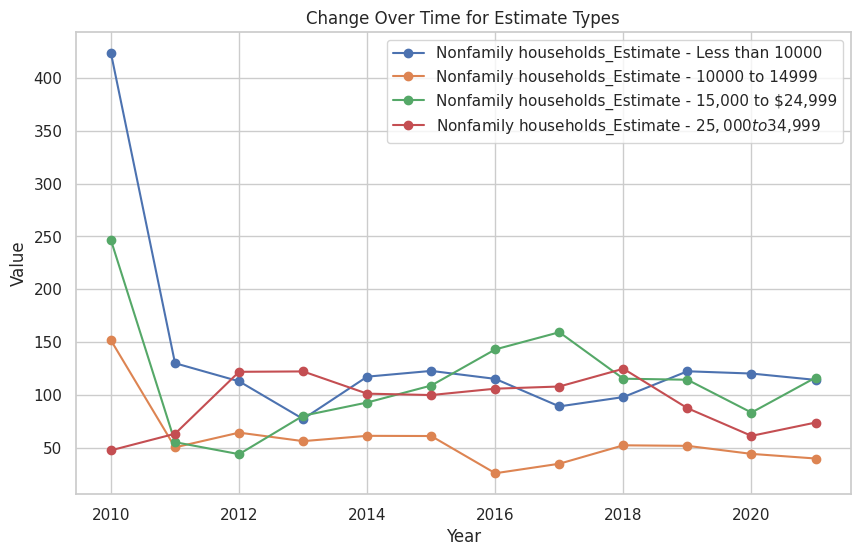

In [37]:
Households_Estimate = df[df['estimate_type'] =='Households_Estimate']
# Create a time series plot for each group
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

plt.plot(Households_Estimate['year'], Households_Estimate['Less than $10,000'], label=f'{name} - Less than 10000', marker='o')
plt.plot(Households_Estimate['year'], Households_Estimate['$10,000 to $14,999'], label=f'{name} - 10000 to 14999', marker='o')
plt.plot(Households_Estimate['year'], Households_Estimate['$15,000 to $24,999'], label=f'{name} - 15,000 to $24,999', marker='o')
plt.plot(Households_Estimate['year'], Households_Estimate['$25,000 to $34,999'], label=f'{name} - $25,000 to $34,999', marker='o')

plt.title("Change Over Time for Estimate Types")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()

plt.show()

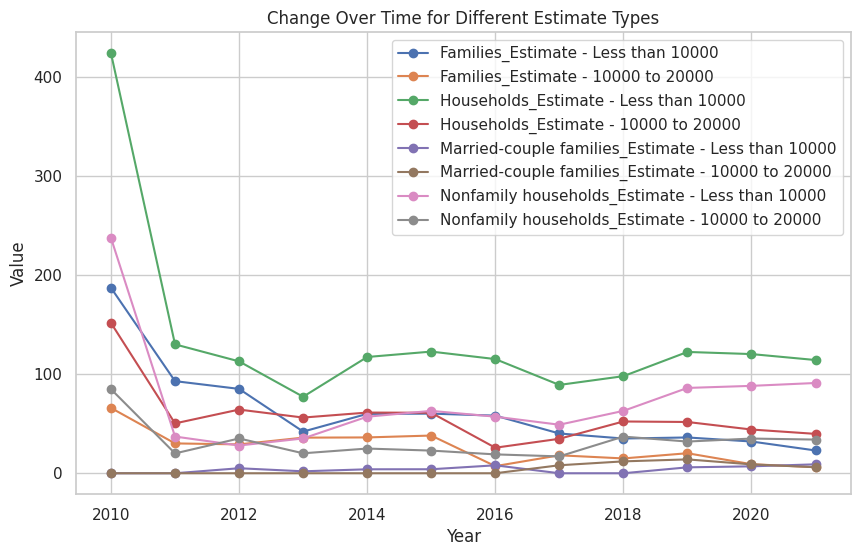

In [34]:
df = ct801
groups = df.groupby('estimate_type')

# Create a time series plot for each group
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

for name, group in groups:
    plt.plot(group['year'], group['Less than $10,000'], label=f'{name} - Less than 10000', marker='o')
    plt.plot(group['year'], group['$10,000 to $14,999'], label=f'{name} - 10000 to 20000', marker='o')

plt.title("Change Over Time for Different Estimate Types")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()

plt.show()

<Axes: xlabel='year', ylabel='Total'>

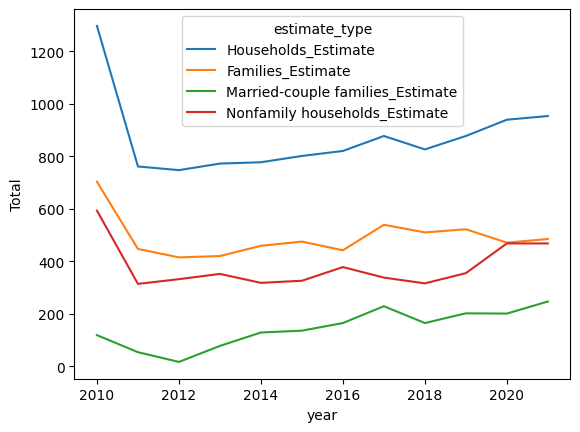

In [45]:
sns.lineplot(data=ct803, x="year", y="Total", hue='estimate_type')

<Axes: xlabel='year', ylabel='Total'>

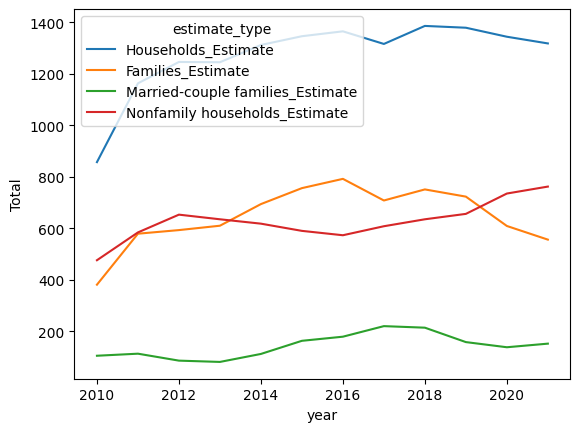

In [52]:
sns.lineplot(data=ct804, x="year", y="Total", hue='estimate_type')

<Axes: xlabel='year', ylabel='Total'>

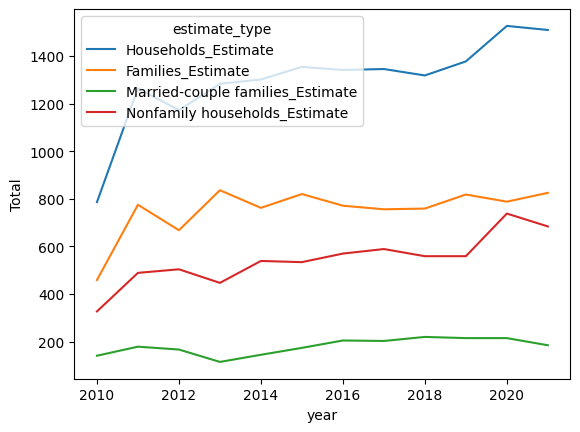

In [53]:
sns.lineplot(data=ct805, x="year", y="Total", hue='estimate_type')

<Axes: xlabel='year', ylabel='Total'>

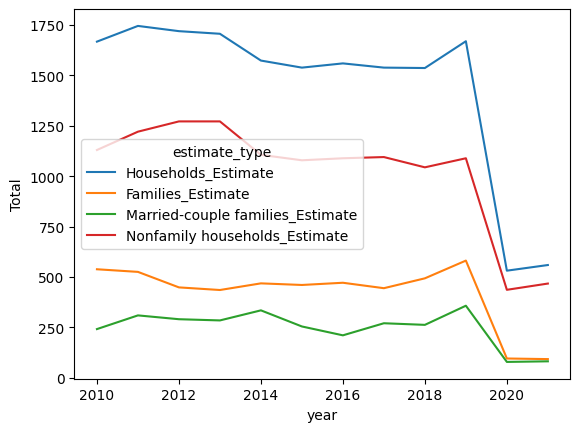

In [42]:
sns.lineplot(data=ct70801, x="year", y="Total", hue='estimate_type')

In [35]:
groups.value_counts()

Series([], dtype: int64)

In [97]:
ct906.to_csv('/content/drive/MyDrive/DS project/example_ct906.csv')

In [ ]:
df = ct70801

In [ ]:
df['Total_Diff'] = df.sort_values(by='year', ascending=True).groupby('estimate_type')['Total'].diff()

# Select the columns you want to display
result_df = df[['estimate_type', 'year', 'Total_Diff']]


In [ ]:
result_df

nan_nan_Label,estimate_type,year,Total_Diff
0,Households_Estimate,2021,0.0
1,Families_Estimate,2021,0.0
2,Married-couple families_Estimate,2021,0.0
3,Nonfamily households_Estimate,2021,0.0
4,Households_Estimate,2021,28.0
5,Families_Estimate,2021,-3.0
6,Married-couple families_Estimate,2021,3.0
7,Nonfamily households_Estimate,2021,31.0
8,Households_Estimate,2020,-1139.0
9,Families_Estimate,2020,-486.0


In [ ]:
df['Prev_Estimate_Type'] = df['estimate_type'].shift()

# Select the columns you want to display
result_df = df[['estimate_type', 'Prev_Estimate_Type', 'Total_Diff']]

print(result_df)


In [ ]:
result_df

,index,Total_Diff
0,0,NaN
1,1,NaN
2,2,NaN
3,3,NaN
4,4,0.0
5,5,0.0
6,6,0.0
7,7,0.0
8,8,-28.0
9,9,3.0


In [ ]:
 /content/drive/MyDrive/DS project/ACSST5Y2020.S1901-2023-10-21T033545.xlsx

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/DS project/ACSST5Y' + str(year) + '.S1901-2023-10-21T033545.xlsx',
                   sheet_name=1, header=None)